In [2]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp

# Numpy library

## Purpose

Numpy is a Python library for mathematical functionalities (matrices, probabilities, ...).   
Combined with the Matplotlib library for drawing the graphs, it can be compared to Matlab.

## Numpy arrays

Numpy `ndarray`  (or its alias `array`) represents an n-dimensional lists of elements.  
All elements in an array must have the same type.  
The type is either infered to the most generic or can be explicitely specified.


In [77]:
m1 = np.array([1, 2, 3])                # 1D array of type int
m2 = np.array([[1, 2], [1.5, 3]])       # 2D array of type float
m3 = np.array([1, 2], dtype='float32')  # 1D array of type float

Pre-constructed arrays :

In [141]:
np.zeros(10, dtype=int)       # 1x10 array of 0
np.ones((3, 5), dtype=float)  # 3x5  array of 1
np.full((3, 5), 3.14)         # 3x5  array of 3.14
np.arange(0, 20, 2)           # [0, 2, 4, ..., 18] (same as builtin "range" but returns an array)
np.linspace(0, 1, 5)          # [0, 0.25, 0.5, 0.75. 1] 5 values regularly spaced between 0 and 1
np.random.random((3, 3))      # 3x3 array of random uniform float values between 0 and 1
np.eye(3)                     # 3x3 identity matrix (1 on the diagonal)
np.empty(100)                 # uninotialized array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Property of Numpy arrays :

In [3]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr.size              # 6
arr.shape             # (2, 3)
arr.dtype             # int64
arr.ndim              # 2
a = arr.itemsize      # 8  (size in memory, same as arr.dtype.itemsize)

# indexing/slicing uses commas to separate each dimension
arr[0,:]              # first line
arr[:,0]              # first column
arr[:2,:2]            # 2x2 square at the top left of the array
arr[arr%2==0]         # indexing on a condition gives only the values verifying the condition [2, 4, 6]

arr1 = np.array([1, 2])
arr2 = np.array([3, 4])
np.concatenate([arr1, arr2])     # [1, 2, 3, 4]

# vstack and hstack for vertical/horizontal concatenation :
arr3 = np.array([[5, 6],
                 [7, 8]])
np.vstack([arr1, arr2, arr3])

# remove duplicates
A = np.array([1, 2, 1, 4, 2, 3])
np.unique(A)                                  # array of unique values (no duplicate)
vals, idx = np.unique(A, return_index=True)   # array of unique values with their index

array([2, 4, 6])

To perform operations on numpy arrays, we should avoid loops, that usually perform a lot of time consuming operations.   
Numpy allows to perform basic operations or functions on the array itself, and it applies it to all elements :

In [108]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
10 + arr                 # add 10 to all cells
arr / 2                  # divide by 2 all elements
np.exp(arr)              # take the exp of all elements
arr > 2                  # for each element, tell whether it is > 2
np.where(arr > 2, 1, 0)  # array with 1 if the condition is true else 0

array([[0, 0, 1],
       [1, 1, 1]])

Built-in operations on arrays :

In [207]:
matrix = np.array([[1,2,3], [4, 5, 6]])      # matrix definition
np.sum(matrix)                               # sum all elements: 21
np.sum(matrix, 0)                            # sum by column: [5, 7, 9]
np.sum(matrix, 1)                            # sum by line:   [6, 15]
np.mean(matrix)                              # mean value of the elements
np.std(matrix)                               # standard deviation of the elements
np.var(matrix)                               # (std)^2
np.sort(matrix)                              # sort each line of the matrix
np.flip(matrix)                              # reverse the array on all axes
np.flip(matrix, 0)                           # reverse on axis 0 (column order unchanged)
np.flip(matrix, 1)                           # reverse on axis 1 (line order unchanged)
matrix.flatten()                             # reshape into a 1D vector

A = np.array([[1, 2], [3, 4]])
B = np.ones((2, 2), dtype=np.int32)
A * B                                        # element-wise product
A @ B                                        # matrix product

A.flatten()                                  # flatten A into [1, 2, 3, 4] as a new array
A.ravel()                                    # flatten A into [1, 2, 3, 4] as a view (changes will affect original)
A.T                                          # transposed matrix
A.reshape(4, 1)                              # reshape A into a new (4, 1) matrix
A.resize(4, 1)                               # reshape A itself (not a copy)

A = np.array([[1, 2, 3, 4, 5, 6],
              [7, 8, 9, 10, 11, 12]])
np.hsplit(A, 3)                              # split lines to create 3 sub-arrays of the same size (2x2)
np.vsplit(A, 2)                              # split columns to create 2 sub-arrays of the same size (1x4)

A.view()                                     # new ndarray on the same data 
                                             # (so reshape does not change A element assignment does)
A.copy()                                     # deep copy of the ndarray



array([1, 2, 3, 4, 5, 6])

## Linear Algebra

Some linear algebra tools are available under `np.linarg` :

In [173]:
A = np.array([[1, 2], [3, 4]])
np.linalg.inv(A)                             # Matrix Inverse

#  x +  y = 10
# 2x - 3y = 10
A = np.array([[1, 1], [2, -3]])
B = np.array([10, 10])
np.linalg.solve(A, B)                        # solve a linear system from the matrix representation

array([8., 2.])

## Random

Some tools to manipulate repeatable pseudo-random sequences are available under `np.random` :

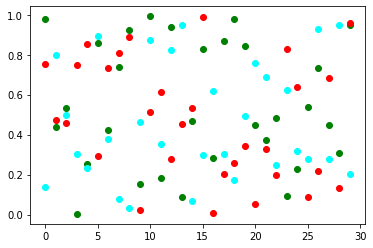

In [5]:
from numpy.random import default_rng

seed = 1234
rng = np.random.default_rng(seed)         # random generator from a given seed
vals1 = rng.standard_normal(10)           # 10 values following N(0, 1)
vals2 = rng.standard_normal(10)           # other 10 values following N(0, 1)
rng.random()                              # random float in [0, 1]
rng.integers(low=0, high=10, size=3)      # 3 random integers between o and 10

# random distribution in [0, 1]
vector = rng.random(30)                   # 30 random floats in [0, 1]
matrix = rng.random((2, 30))              # 2 lines of 30 random floats in [0, 1]
plot = plt.scatter(range(30), vector,    color='green')
plot = plt.scatter(range(30), matrix[0], color='red')
plot = plt.scatter(range(30), matrix[1], color='cyan')

## Common probability distribution

Numpy random generators offer some common distributions :

(array([494., 275., 119.,  52.,  25.,  22.,   5.,   5.,   2.,   1.]),
 array([5.28822578e-03, 7.48420749e+00, 1.49631268e+01, 2.24420460e+01,
        2.99209653e+01, 3.73998846e+01, 4.48788038e+01, 5.23577231e+01,
        5.98366423e+01, 6.73155616e+01, 7.47944809e+01]),
 <BarContainer object of 10 artists>)

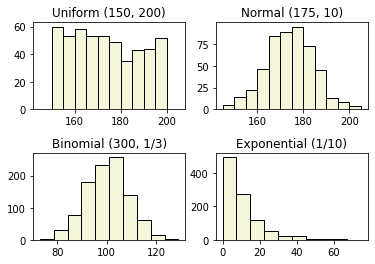

In [55]:
_, ax = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

a = rng.uniform(150, 200, 500)
ax[0,0].set_title('Uniform (150, 200)')
ax[0,0].hist(a, bins=np.arange(145, 210, 5), color="beige", edgecolor="black")

a = rng.normal(175, 10, 500)
ax[0,1].set_title('Normal (175, 10)')
ax[0,1].hist(a, bins=np.arange(145, 210, 5), color="beige", edgecolor="black")

n, p = 300, 1/3
a = rng.binomial(n, p, 1000)
ax[1,0].set_title('Binomial (300, 1/3)')
ax[1,0].hist(a, color="beige", edgecolor="black")

scale = 10        # scale = 1/lambda
a = rng.exponential(scale, 1000)
ax[1,1].set_title('Exponential (1/10)')
ax[1,1].hist(a, color="beige", edgecolor="black")
